In [4]:
pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
data=("C:/Users/ACER/Desktop/task machine learning/Employee (1).csv")
df=pd.read_csv(data)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [23]:
#Data Exploration: Explore the data, list down the unique values in each feature and find 
#its length. Perform the statistical analysis and renaming of the columns.


In [24]:
#check whether there is any missing values
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [25]:
#Find the unique values
df_unique=df.nunique()
df_unique

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [26]:
#Perform the statistical analysis and renaming of the columns.
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


### data cleaning


In [30]:
#replace 0 with NaN in the age column
df["Age"] = df["Age"].replace(0, np.nan)


In [32]:
#check the value is replaced
df.iloc[6]

Company        TCS
Age            NaN
Salary      6000.0
Place      Chennai
Country      India
Gender           1
Name: 6, dtype: object

In [33]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
# Filling null values using mean and mode
df.fillna({'Salary': df['Salary'].mean(), 'Place': df['Place'].mode()[0], 'Country': df['Country'].mode()[0], 'Gender': df['Gender'].mode()[0]}, inplace=True)


In [36]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [37]:
#Remove all duplicate rows.
df.drop_duplicates(inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


### data analysis

In [38]:
#Filter the data with age>40 and salary<5000
df1=df[(df['Age'] > 40) & (df['Salary'] < 5000)]
df1

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


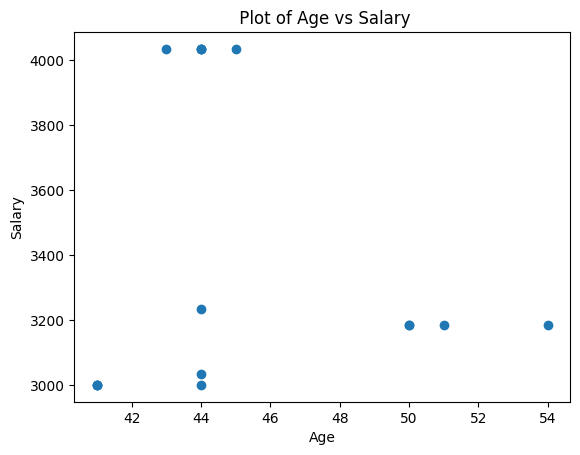

In [39]:
#Scatter chart with age and salary
plt.scatter(df1['Age'], df1['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title(' Plot of Age vs Salary')
plt.show()

In [43]:
#Count the number of people from each place
place_count=df['Place'].value_counts()
place_count

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

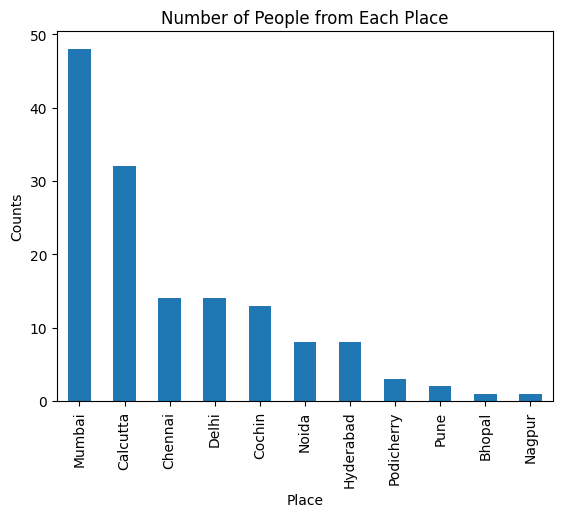

In [41]:
# visually represent the number of people from each place
p = df['Place'].value_counts()
p.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Counts')
plt.title('Number of People from Each Place')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### data encoding

In [44]:
#One hot encoding
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Place", "Country"])
df_one_hot_encoded 

,Company,Age,Salary,Gender,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,TCS,20.0,5312.467742,0,False,False,True,False,False,False,False,False,False,False,False,True
1,Infosys,30.0,5312.467742,0,False,False,False,False,False,False,True,False,False,False,False,True
2,TCS,35.0,2300.000000,0,False,True,False,False,False,False,False,False,False,False,False,True
3,Infosys,40.0,3000.000000,0,False,False,False,False,True,False,False,False,False,False,False,True
4,TCS,23.0,4000.000000,0,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,0,False,False,False,False,False,False,True,False,False,False,False,True
143,TCS,33.0,9024.000000,1,False,True,False,False,False,False,False,False,False,False,False,True
145,Infosys,44.0,4034.000000,1,False,False,False,False,True,False,False,False,False,False,False,True
146,TCS,33.0,5034.000000,1,False,False,False,False,False,False,True,False,False,False,False,True


In [45]:
cols_to_encode = ["Place", "Country"]
new_encoded_cols_names = []

from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Place", "Country"]
new_encoded_cols_names = []

# Create a list of new column names
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]

new_encoded_cols_names

# Initialize and fit the OneHotEncoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the selected columns
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to a Pandas DataFrame
df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)

# Join the new DataFrame with the original DataFrame
df_one_hot_encoded = df.join(df_encoded)
df_one_hot_encoded

,Company,Age,Salary,Place,Country,Gender,is_Chennai,is_Mumbai,is_Calcutta,is_Delhi,is_Podicherry,is_Cochin,is_Noida,is_Hyderabad,is_Bhopal,is_Nagpur,is_Pune,is_India
0,TCS,20.0,5312.467742,Chennai,India,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5312.467742,Mumbai,India,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.000000,Calcutta,India,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.000000,Delhi,India,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.000000,Mumbai,India,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
143,TCS,33.0,9024.000000,Calcutta,India,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145,Infosys,44.0,4034.000000,Delhi,India,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,TCS,33.0,5034.000000,Mumbai,India,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    df[i] = label_encoder.fit_transform(df[i])
df

,Company,Age,Salary,Place,Country,Gender
0,4,3,21,2,0,0
1,2,10,21,6,0,0
2,4,15,3,1,0,0
3,2,19,5,4,0,0
4,4,6,12,6,0,0
...,...,...,...,...,...,...
142,3,5,33,6,0,0
143,4,13,38,1,0,1
145,2,22,13,4,0,1
146,4,13,19,6,0,1


### Feature Scaling

In [49]:

#standard scaler
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)


scaled_data

array([[ 0.83743579, -1.42727641,  0.13960436, -0.89325451,  0.        ,
        -0.53452248],
       [-0.27914526, -0.59853527,  0.13960436,  0.7505621 ,  0.        ,
        -0.53452248],
       [ 0.83743579, -0.00657731, -1.36812276, -1.30420866,  0.        ,
        -0.53452248],
       [-0.27914526,  0.46698906, -1.20059753, -0.07134621,  0.        ,
        -0.53452248],
       [ 0.83743579, -1.07210164, -0.6142592 ,  0.7505621 ,  0.        ,
        -0.53452248],
       [-0.27914526,  1.53251338, -0.19544611, -1.30420866,  0.        ,
        -0.53452248],
       [ 0.83743579,  1.53251338,  0.55841745, -0.89325451,  0.        ,
         1.87082869],
       [-0.27914526, -1.07210164,  0.80970531,  0.7505621 ,  0.        ,
         1.87082869],
       [ 0.83743579, -0.1249689 ,  1.06099316, -1.30420866,  0.        ,
         1.87082869],
       [-1.39572632,  0.94055542,  1.47980625, -0.07134621,  0.        ,
        -0.53452248],
       [-1.39572632, -1.07210164,  0.13960436,  0.

In [50]:
#minmaxscaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

scaled_data

array([[0.66666667, 0.10714286, 0.525     , 0.2       , 0.        ,
        0.        ],
       [0.33333333, 0.35714286, 0.525     , 0.6       , 0.        ,
        0.        ],
       [0.66666667, 0.53571429, 0.075     , 0.1       , 0.        ,
        0.        ],
       [0.33333333, 0.67857143, 0.125     , 0.4       , 0.        ,
        0.        ],
       [0.66666667, 0.21428571, 0.3       , 0.6       , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.425     , 0.1       , 0.        ,
        0.        ],
       [0.66666667, 1.        , 0.65      , 0.2       , 0.        ,
        1.        ],
       [0.33333333, 0.21428571, 0.725     , 0.6       , 0.        ,
        1.        ],
       [0.66666667, 0.5       , 0.8       , 0.1       , 0.        ,
        1.        ],
       [0.        , 0.82142857, 0.925     , 0.4       , 0.        ,
        0.        ],
       [0.        , 0.21428571, 0.525     , 0.6       , 0.        ,
        0.        ],
       [0.        , 0